Source: https://github.com/veltridp/ace-intro-to-deep-learning

Here we're going to use a convolutional neural network (CNN)- specifically an
2D CNN to try and predict if images from the CIFAR10 dataset belong to one of
ten classes/categories. For more details on Keras' CNN implementation see:
https://keras.io/layers/convolutional/

The problems we need to solve to use our CNN are:

1) How do we 'massage' our image data and responses so that it fits into our network?
	- We'll have to do some reshaping first!
	
2) Parameters - How good of performance can you get?
	- Try adjusting the number of epochs, filters and kernal sizes 
	
The CIFAR10 Data: Keras comes with a pre-processed training/testing data set (cifar10) that
includes 50,000 32x32 color (RGB) images labeled as one of ten classes. Load the data as follow:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train and x_test are arrays containing RGB images (num_samples, 3, 32, 32)
y_train and y_test contain arrays of corresponding category numbers (0-9)

More dataset details available in: https://keras.io/datasets/

Challenge:  Can you add additional Conv and pooling layers to the model and improve the ACC?


In [2]:
from __future__ import print_function #python3 printing

# These two lines likely only needed on Mac
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf # we can now access tf.keras as needed
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model # needed to load saved models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [13]:
# User set model params
num_filters = 32    # Number of filters to apply to image
kern_shape = (5,5)  # kernel size of filters to slide over image
stride_size = (1,1) # How for to move/slide kernel
num_epochs = 15     # Rounds of training
num_batches = 32    # No. of samples per patch to train at a time

In [17]:
# Function to enable us to plot our training history
def plot_model_history(model_history, save_plot=True, plot_filename='train_history_plot.png'):
    '''
    On entry: model_history is output of keras model.fit, save_plot is boolean, plot_filename is save location
    On exit: If save_plot is True, figure saved to plot_filename path, else matplot figure is shown.    
    '''
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # summarize history for accuracy on left plot
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    
    # summarize history for loss on right plot
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    
    if save_plot:
        plt.savefig(plot_filename) #if you prefer to save a local copy
        plt.close(fig)
    else:
        plt.show()
    return

In [6]:

# Load in image data and responses
print("Loading in data.")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("\n\nLoaded {} training examples with {} responses and {} testing examples with {} responses.".format(len(x_train),len(y_train),len(x_test),len(y_test)))


Loading in data.
170508288/170498071 [==============================] - 34s 0us/step


Loaded 50000 training examples with 50000 responses and 10000 testing examples with 10000 responses.


In [7]:
# Reshape and normalize the image data. Adjust the responses to be categorical
x_train = x_train.reshape(x_train.shape[0],32,32,3).astype('float32')/255
x_test = x_test.reshape(y_test.shape[0],32,32,3).astype('float32')/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

# Let's just train on the first few thousand samples to speed things up!
# Note we shouldn't expect good performance with a sample this small.
x_train = x_train[0:2000,:]
y_train = y_train[0:2000,:]

In [18]:
# Define our sequential model
print("\nBuilding model...")
model = Sequential()
model.add(Conv2D(num_filters,
                 kernel_size=kern_shape,
                 strides=stride_size,
                 padding='same',
                 input_shape=(32,32,3))) #this needs to fit our image dimensions and no. of color chanels (RGB=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) #we need outputs in one of ten categories
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Building model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________
None



Training now...
Epoch 1/15
63/63 [==============================] - 5s 66ms/step - loss: 2.0789 - accuracy: 0.2445 - val_loss: 1.8998 - val_accuracy: 0.3491
Epoch 2/15
63/63 [==============================] - 4s 59ms/step - loss: 1.7231 - accuracy: 0.4035 - val_loss: 1.8034 - val_accuracy: 0.3608
Epoch 3/15
63/63 [==============================] - 4s 63ms/step - loss: 1.5808 - accuracy: 0.4530 - val_loss: 1.7488 - val_accuracy: 0.3829
Epoch 4/15
63/63 [==============================] - 4s 61ms/step - loss: 1.4653 - accuracy: 0.4885 - val_loss: 1.7578 - val_accuracy: 0.3893
Epoch 5/15
63/63 [==============================] - 3s 49ms/step - loss: 1.3694 - accuracy: 0.5390 - val_loss: 1.8004 - val_accuracy: 0.3759
Epoch 6/15
63/63 [==============================] - 4s 62ms/step - loss: 1.3143 - accuracy: 0.5540 - val_loss: 1.7782 - val_accuracy: 0.3843
Epoch 7/15
63/63 [==============================] - 4s 60ms/step - loss: 1.2315 - accuracy: 0.5745 - val_loss: 1.8010 - val_accuracy: 0.3

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


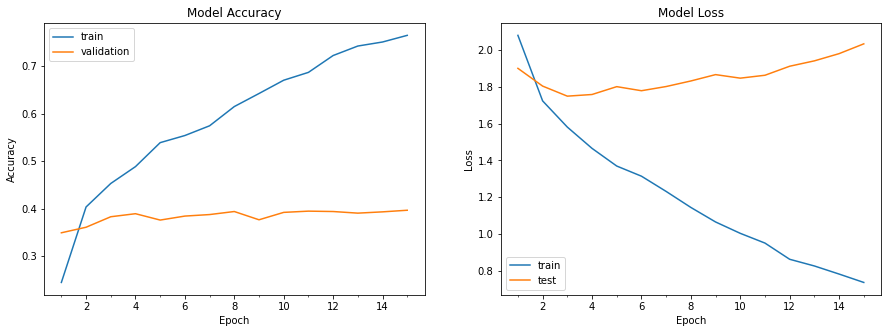

In [19]:

print("\nTraining now...")
model_info = model.fit(x_train, y_train, 
                       epochs=num_epochs,
                       batch_size=num_batches,
                       validation_data = (x_test,y_test),
                       verbose=1)

plot_model_history(model_info, save_plot=False)




In [15]:
print("\nMaking predictions...")
result = model.predict(x_test)


Making predictions...


In [21]:
#Calc ACC stats
predicted_class = np.argmax(result, axis=1)
true_class = np.argmax(y_test, axis=1)
num_correct = np.sum(predicted_class == true_class) 
acc = float(num_correct)/len(result) * 100.0
print("\nModel Testing Accuracy: {}%".format(np.round(acc,2)))


Model Testing Accuracy: 38.16%
